   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


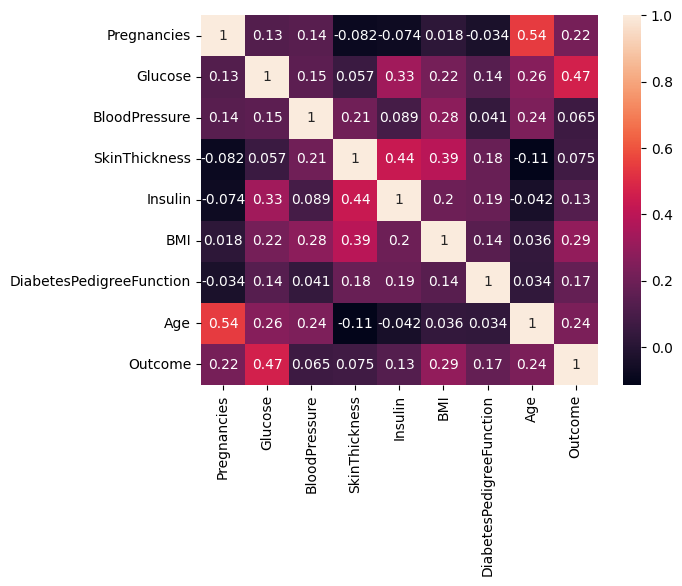

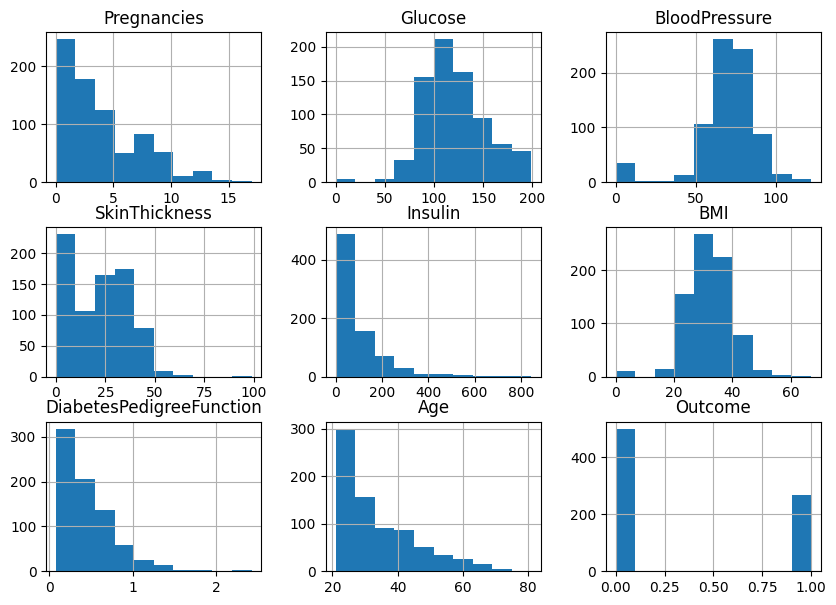

In [51]:

import pandas as pd
df=pd.read_csv( 'C:/Users/Dell/Desktop/S6/MachineLearning/mini project/diabetes.csv')
print(df.head())
df.shape

df.isnull().sum()
corr = df.corr()
corr

# render the plot inline, instead of in a separate window
%matplotlib inline
import seaborn as sns
sns.heatmap(corr,annot =True)

import matplotlib.pyplot as plt
df.hist(figsize=(10, 7))
plt.show()

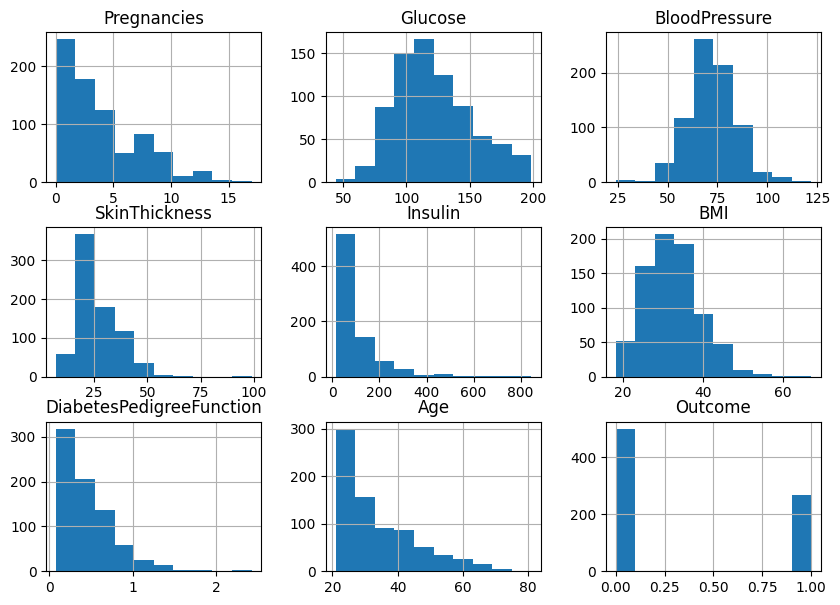

In [52]:
#prepossesing
bmi_med = df['BMI'].median()
df['BMI'] = df['BMI'].replace(to_replace=0 , value=bmi_med)

bp_med = df['BloodPressure'].median()
df['BloodPressure'] = df['BloodPressure'].replace(to_replace=0 , value=bp_med)

glu_med = df['Glucose'].median()
df['Glucose'] = df['Glucose'].replace(to_replace=0 , value=glu_med)

skin_med = df['SkinThickness'].median()
df['SkinThickness'] = df['SkinThickness'].replace(to_replace=0 , value=skin_med)

in_med = df['Insulin'].median()
df['Insulin'] = df['Insulin'].replace(to_replace=0 , value=in_med)

df.to_csv("pre_processed.csv",index=False)

df.hist(figsize=(10, 7))
plt.show()

In [53]:
df = pd.read_csv('pre_processed.csv')
print(df.head())
num_obs = len(df)
num_true = len(df.loc[df['Outcome'] == 1])
num_false = len(df.loc[df['Outcome'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [54]:
#Splitting the data into dependent and independent variables
Y = df.Outcome
x = df.drop('Outcome', axis = 1)
columns = x.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

print(data_x.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.831114 -0.608201  0.167240   
1    -0.844885 -1.205066      -0.528319       0.180566 -0.608201 -0.851551   
2     1.233880  2.016662      -0.693761      -0.469981 -0.608201 -1.331838   
3    -0.844885 -1.073567      -0.528319      -0.469981 -0.006185 -0.633239   
4    -1.141852  0.504422      -2.679076       0.831114  0.695378  1.549885   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


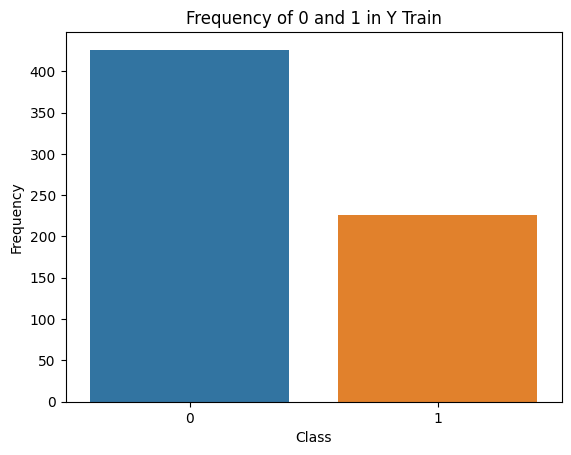

84.90% in training set
15.10% in test set
Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 226 (34.66%)
Training False : 426 (65.34%)

Test True      : 42 (36.21%)
Test False     : 74 (63.79%)


In [55]:
#Splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)
   
sns.countplot(x=y_train)
plt.title('Frequency of 0 and 1 in Y Train')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#Checking that the split is done correctly:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index)) * 100))

#Let's check to make sure that the values are distributed evenly across the training and testing data
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 1]), (len(df.loc[df['Outcome'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 0]), (len(df.loc[df['Outcome'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

In [56]:
#A huge imbalance can be observed in the y_train values. To overcome this problem, we use the SMOTE technique.

#Synthetic Minority Oversampling Technique (SMOTE) is used to remove the imbalance in the training data by creating samples using the current data.
#It does not create duplicates. 
#Remember it is always done on the Training Date and not on the original data as the Test Data should only contain real-life values and not the synthetic sample.
import numpy as np
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)
np.bincount(y_train)


array([426, 426], dtype=int64)

In [57]:
#We now have a balanced Training data.
#Our data is now prepared to fit a model
#The first model we fit on the training data is the Logistic Regression.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

#Confusion Matrix: The confusion matrix is a table that summarizes the performance of a classification model.
# It shows the number of true positives, false positives, true negatives, and false negatives.

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("this is the confusion matrex :\n " , conf_matrix)

#Score:
#The score function returns the mean accuracy on the given test data and labels.

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print ("this is the test  accuracy score :\n",score)

#Classification Report:
#The classification report is a text report that shows the precision, recall, F1-score, and support for each class.

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("this is Classification Report : \n" , class_report)



Accuracy of logistic regression classifier on test set: 0.73
this is the confusion matrex :
  [[55 19]
 [12 30]]
this is the test  accuracy score :
 0.7327586206896551
this is Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        74
           1       0.61      0.71      0.66        42

    accuracy                           0.73       116
   macro avg       0.72      0.73      0.72       116
weighted avg       0.75      0.73      0.74       116



In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))

conf_matrix = confusion_matrix(y_test, y_pred)
print("this is the confusion matrex :\n " , conf_matrix)

#Score:
#The score function returns the mean accuracy on the given test data and labels.

score = accuracy_score(y_test, y_pred)
print ("this is the test  accuracy score :\n",score)

class_report = classification_report(y_test, y_pred)
print("this is Classification Report : \n" , class_report)

Accuracy of Random Forest on test set: 0.76
this is the confusion matrex :
  [[57 17]
 [11 31]]
this is the test  accuracy score :
 0.7586206896551724
this is Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80        74
           1       0.65      0.74      0.69        42

    accuracy                           0.76       116
   macro avg       0.74      0.75      0.75       116
weighted avg       0.77      0.76      0.76       116



Feature ranking:


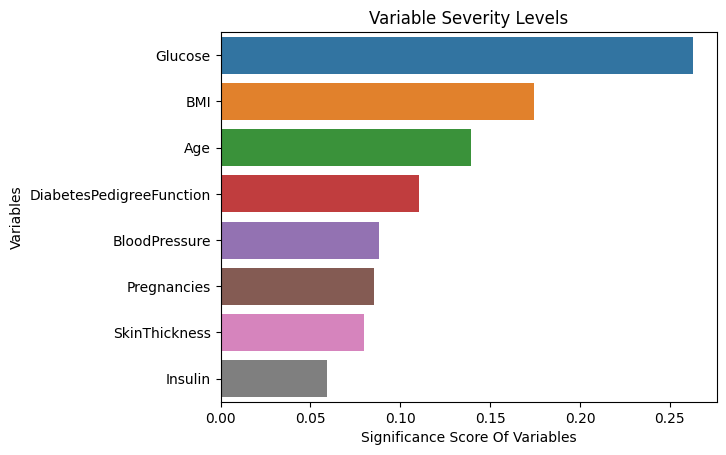

In [59]:
rf_tuned = model.fit(x_train,y_train)
importances = pd.Series(model.feature_importances_,
                        index=columns).sort_values(ascending=False)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

sns.barplot(x=importances, y=importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


In [65]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rf_tuned)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(x_test)


array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0], dtype=int64)

In [66]:
rf_tuned.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [68]:
rf_params = {"n_estimators" :[100,200], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

from sklearn.model_selection import GridSearchCV
gs_cv = GridSearchCV(model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(x_train,y_train)


gs_cv.best_params_
#Final Model Installation
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)
rf_tuned = rf_tuned.fit(x_train,y_train)
from sklearn.model_selection import  cross_val_score
cross_val_score(rf_tuned, x_train, y_train, cv = 10).mean()



Fitting 10 folds for each of 96 candidates, totalling 960 fits


0.8251983584131326

In [85]:

# Extrapolated data
X_new = [[0, 180, 80, 40, 200, 50, 1.5, 60],
         [2, 100, 70, 20, 50, 35, 0.5, 25],
         [0,137,40,35,168,43.1,2.228,33]]
#last one is the 4th patient

# Make predictions on the extrapolated data
predictions = rf_tuned.predict(X_new)
print(predictions)


[1 1 0]


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
